<a href="https://colab.research.google.com/github/SoumyaTathagata/GGV-Intern/blob/main/Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime,timedelta
from matplotlib import dates as mpl_dates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
apple = pd.read_csv(r'/AAPL.csv')
apple.set_index('Date',inplace=True)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-22,24.815001,24.825001,24.577499,24.665001,23.041672,113254800
2016-07-25,24.562500,24.709999,24.230000,24.334999,22.733387,161531600
2016-07-26,24.205000,24.492500,24.105000,24.167500,22.576918,224959200
2016-07-27,26.067499,26.087500,25.687500,25.737499,24.043583,369379200
2016-07-28,25.707500,26.112499,25.705000,26.084999,24.368214,159479200
...,...,...,...,...,...,...
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.449997,121434600
2021-07-20,143.460007,147.100006,142.960007,146.149994,146.149994,96238600


In [ ]:
apple.shape

(1259, 6)

In [ ]:
apple.info

<bound method DataFrame.info of                   Open        High  ...   Adj Close     Volume
Date                                ...                       
2016-07-22   24.815001   24.825001  ...   23.041672  113254800
2016-07-25   24.562500   24.709999  ...   22.733387  161531600
2016-07-26   24.205000   24.492500  ...   22.576918  224959200
2016-07-27   26.067499   26.087500  ...   24.043583  369379200
2016-07-28   25.707500   26.112499  ...   24.368214  159479200
...                ...         ...  ...         ...        ...
2021-07-16  148.460007  149.759995  ...  146.389999   93100300
2021-07-19  143.750000  144.070007  ...  142.449997  121434600
2021-07-20  143.460007  147.100006  ...  146.149994   96238600
2021-07-21  145.529999  146.130005  ...  145.399994   74915000
2021-07-22  145.934998  147.550003  ...  147.485001   27148123

[1259 rows x 6 columns]>

In [ ]:
apple.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,63.381378,64.071033,62.711102,63.424754,62.287679,1.258345e+08
std,33.967646,34.408770,33.467364,33.955257,34.449987,5.753507e+07
min,24.205000,24.492500,24.105000,24.167500,22.576918,2.714812e+07
25%,39.474998,39.862499,39.045000,39.372500,37.933684,8.765580e+07
50%,48.715000,49.197498,48.287498,48.702499,47.653847,1.097448e+08
75%,78.988751,79.781250,78.262501,79.197502,78.401482,1.460042e+08
max,149.240005,150.000000,147.679993,149.149994,149.149994,4.479400e+08


Text(0.5, 1.0, 'Closing Price of APPLE')

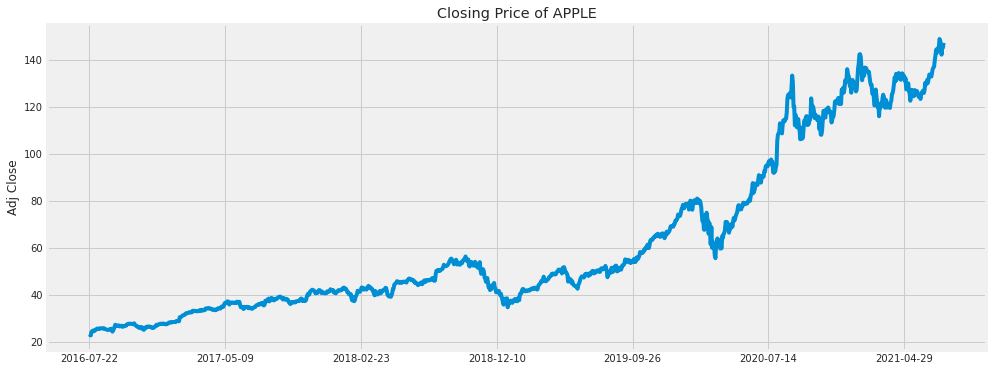

In [ ]:
plt.figure(figsize=(15, 6))
apple['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of APPLE")


Text(0.5, 1.0, 'Sales Volume of APPLE')

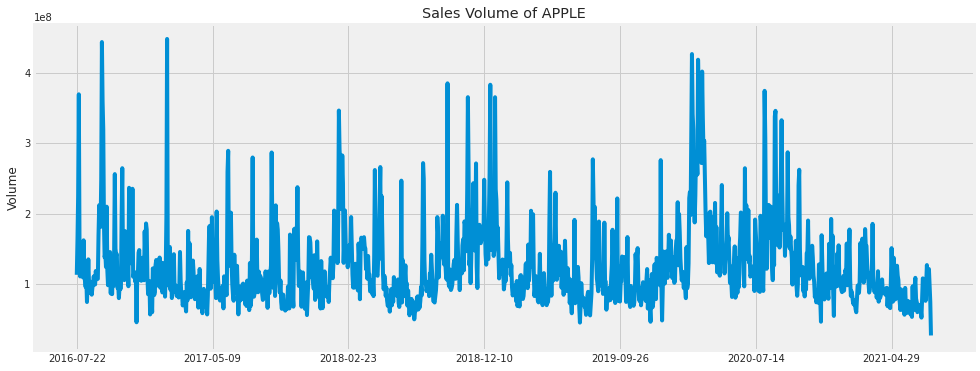

In [ ]:
plt.figure(figsize=(15, 6))
apple['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of APPLE")

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    apple[column_name] = apple['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'APPLE')

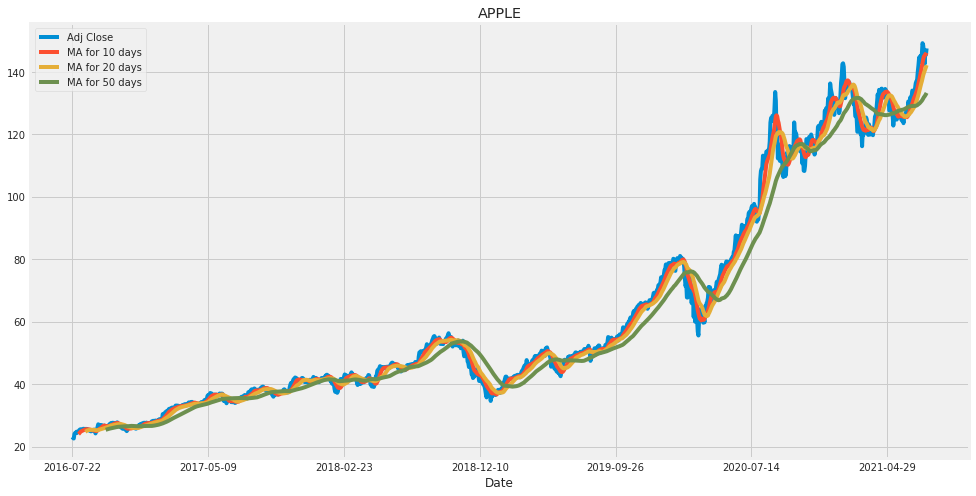

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)

apple[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('APPLE')

Text(0.5, 1.0, 'APPLE')

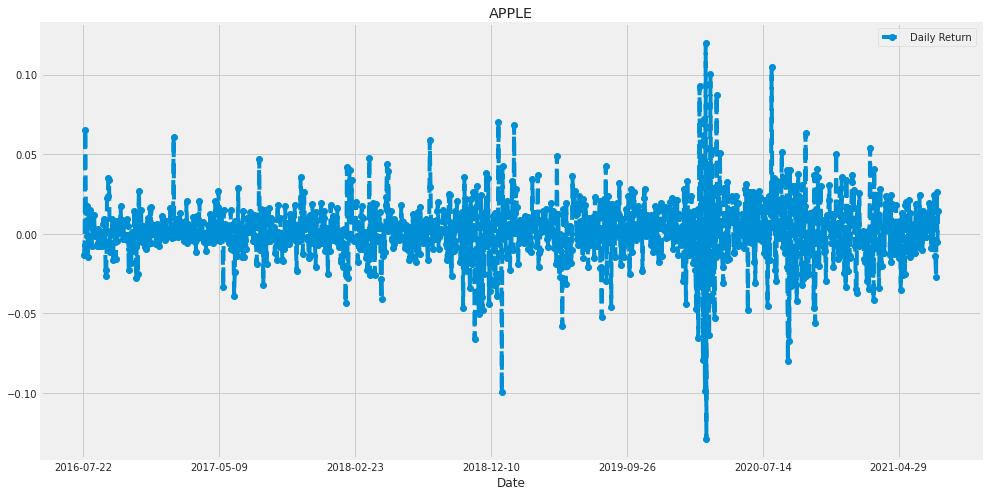

In [ ]:
apple['Daily Return'] = apple['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)
apple['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('APPLE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


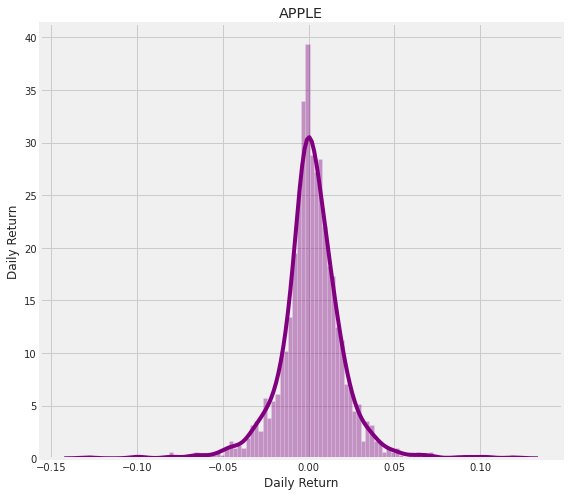

In [ ]:
plt.figure(figsize=(8, 7))
sns.distplot(apple['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('APPLE')
plt.tight_layout()

In [ ]:
apple

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2016-07-22,24.815001,24.825001,24.577499,24.665001,23.041672,113254800,NaN,NaN,NaN,NaN
2016-07-25,24.562500,24.709999,24.230000,24.334999,22.733387,161531600,NaN,NaN,NaN,-0.013379
2016-07-26,24.205000,24.492500,24.105000,24.167500,22.576918,224959200,NaN,NaN,NaN,-0.006883
2016-07-27,26.067499,26.087500,25.687500,25.737499,24.043583,369379200,NaN,NaN,NaN,0.064963
2016-07-28,25.707500,26.112499,25.705000,26.084999,24.368214,159479200,NaN,NaN,NaN,0.013502
...,...,...,...,...,...,...,...,...,...,...
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300,144.906001,139.568002,131.8478,-0.014076
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.449997,121434600,145.155000,140.167501,132.1064,-0.026914
2021-07-20,143.460007,147.100006,142.960007,146.149994,146.149994,96238600,145.567999,140.860001,132.4252,0.025974


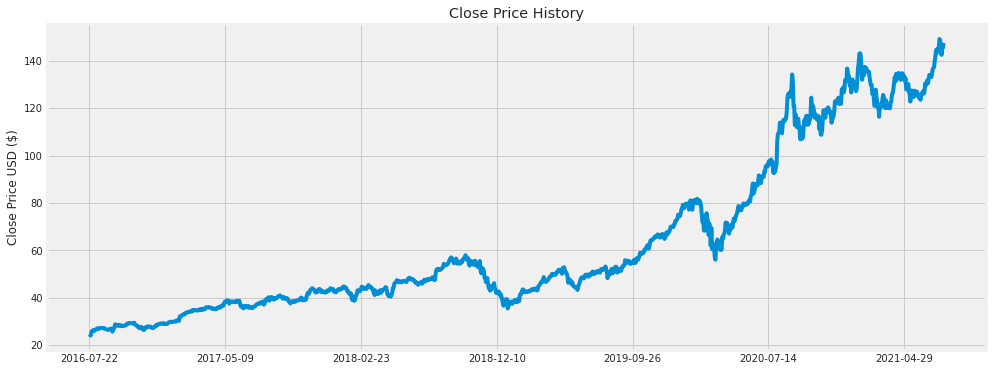

In [ ]:
plt.figure(figsize=(15, 6))
apple['Close'].plot()
plt.ylabel('Close Price USD ($)')
plt.xlabel(None)
plt.title('Close Price History')
plt.show()

In [ ]:
data = apple.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1197

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00398057],
       [0.00134018],
       [0.        ],
       ...,
       [0.97599664],
       [0.9699958 ],
       [0.98667819]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00398057, 0.00134018, 0.        , 0.01256175, 0.01534214,
       0.01508211, 0.01876264, 0.0156222 , 0.01824255, 0.01840259,
       0.02162304, 0.02340329, 0.02428339, 0.02266317, 0.02252315,
       0.02302322, 0.0256236 , 0.02542355, 0.02510352, 0.02482348,
       0.02538355, 0.02368332, 0.02436341, 0.02272318, 0.02180305,
       0.02054288, 0.02030284, 0.01866261, 0.01886264, 0.02012283,
       0.02212311, 0.02206308, 0.02338327, 0.01770247, 0.0129218 ,
       0.01754246, 0.02256315, 0.03020422, 0.03780529, 0.03650511,
       0.03382474, 0.03380473, 0.03376474, 0.03590504, 0.03208449,
       0.03242453, 0.03284459, 0.03456483, 0.03102434, 0.0327646 ,
       0.03170443, 0.03266457, 0.0327646 , 0.03444482, 0.03478486,
       0.03876544, 0.03926551, 0.04134578, 0.0406257 , 0.04192586])]
[0.04176585722477261]

[array([0.00398057, 0.00134018, 0.        , 0.01256175, 0.01534214,
       0.01508211, 0.01876264, 0.0156222 , 0.01824255, 0.01840259,
       0.02162304, 0.02340329, 0.02

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1137/1137 [==============================] - 54s 31ms/step - loss: 0.0030


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.293687452108727

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


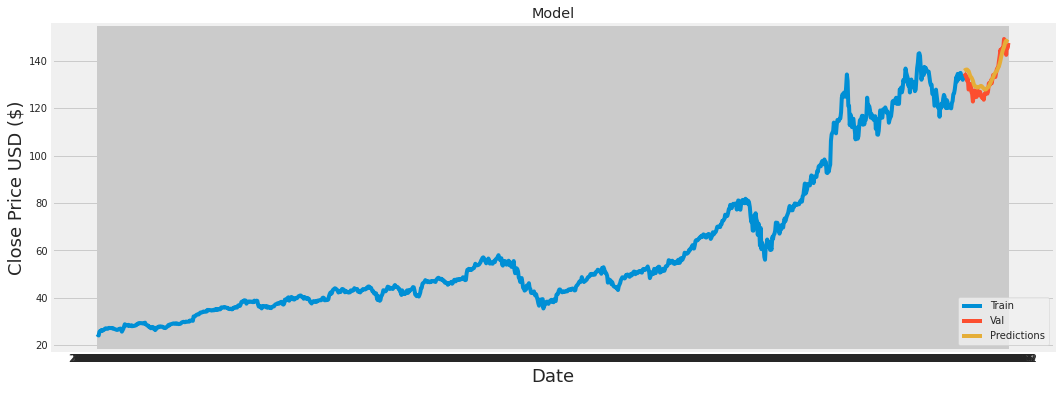

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-04-26,134.720001,135.759384
2021-04-27,134.389999,135.962296
2021-04-28,133.580002,136.172668
2021-04-29,133.479996,136.246887
2021-04-30,131.460007,136.243378
...,...,...
2021-07-16,146.389999,147.955170
2021-07-19,142.449997,148.460220
2021-07-20,146.149994,148.090683
